## Final Project Submission

Please fill out:
* Student name: Fidelis Wanalwenge 
* Student pace: Part Time (PT04)
* Scheduled project review date/time: 
* Instructor name: Stella Waithera
* Blog post URL:


# Business Problem

Microsoft wanted to create a new movie studio, but they don't know anything about creating movies. So the project will cover exploring and analyzing movie data to find what types of films are currently doing the best at the box office and come up with recommendations for business.

# The Data

In order to generate actionable insights for this stakeholder, we are inspecting several data sets containing film information.These include;

1. [Box Office Mojo](https://www.boxofficemojo.com/)
2. [IMDB](https://www.imdb.com/)
3. [Rotten Tomatoes](https://www.rottentomatoes.com/)
4. [TheMovieDB](https://www.themoviedb.org/)
5. [The Numbers](https://www.the-numbers.com/)

To analyze the data,we start by importing the required libraries 


In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
from pandasql import sqldf



In [2]:
#Loading the datasets to be analyzed
basics_names = pd.read_csv("zippedData/imdb.name.basics.csv.gz")

ratings = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")

movies_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

basics_titles = pd.read_csv("zippedData/imdb.title.basics.csv.gz")

movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

movies = pd.read_csv("zippedData/tmdb.movies.csv.gz")


It is necessary to preview a summary of information in the datasets to determine what areas will be investigated in order to derive insights.

In [3]:
#Previewing info for basics_names dataset
basics_names.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [4]:
#Previewing info for movies_gross dataset
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
#Previewing info for movies dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [6]:
#Previewing info for movies_budgets dataset
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
#Previewing info for ratings dataframe
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
#Previewing info for basics_titles dataframe
basics_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


# **Questions to be Answered:**

From the information above, the following questions can be analyzed;


1. What is the best time of the year to release movies?

2. What is the most popular genre?

3. What is the relationship between rating vs profit/loss and rating vs release year?

4. What is the Average movie runtime?

# **Question 1. What is the best time of the year to release movies?**

In [9]:
#Previewing movie_budgets dataframe 
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [10]:
#Previwing shape of the movie_budgets dataframe
movie_budgets.shape

(5782, 6)

In [11]:
#Previewing  sum of null values per column
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [12]:
#fuction to convert object to int
def convert_col_to_int(df, col):
    df[col]= df[col].str.replace("$","").str.replace("," , ""). astype('int64')
    return df

In [13]:
#calling the fuction to convert
cols_to_convert = ['production_budget','domestic_gross', 'worldwide_gross']
for col in cols_to_convert :
    movie_budgets = convert_col_to_int(movie_budgets, col)

In [14]:
#finding out the profit/loss of the movie and adding column difference to dataframe
movie_budgets['profit/loss'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit/loss
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [15]:

#adding column month to dataframe
movie_budgets['release_month']=pd.to_datetime(movie_budgets
                         ['release_date']).dt.month

movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit/loss,release_month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12


In [16]:
#checking for the nullvalues
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit/loss          0
release_month        0
dtype: int64


Grouping the dataframe by month in which the movies were released and totaling the colummns so we can know which month was more profitable to release the movie.

In [17]:
#Grouping the dataframe by release_month and finding the total profit in each month
profit_by_month_df = movie_budgets.groupby(by=['release_month']).sum()

In [18]:
#reseting the index
profit_by_month_df= profit_by_month_df.reset_index()

In [19]:
profit_by_month_df

,release_month,id,production_budget,domestic_gross,worldwide_gross,profit/loss
0,1,17371,7232691000,8310517342,16157646936,8924955936
1,2,19855,10994196247,13882543926,28045454121,17051257874
2,3,23461,14467577021,18129303397,37897684431,23430107410
3,4,23209,10806485000,12407092932,27203797390,16397312390
4,5,20576,19184024596,27146065077,66043077615,46859053019
5,6,23999,20644478311,31531570976,68268531657,47624053346
6,7,22046,18720308775,26720337439,62023990453,43303681678
7,8,26028,12675822719,15955429870,30245291880,17569469161
8,9,23905,10753760847,11412894262,23019987786,12266226939
9,10,28645,11684993000,13994662807,28343193867,16658200867


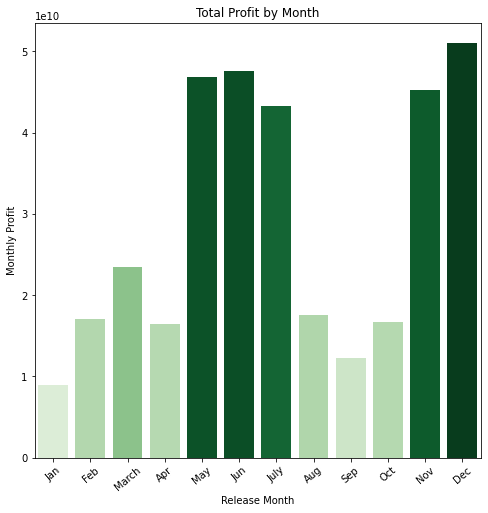

In [67]:
#Plotting the graph
name = pd.DataFrame({'release_month': ['Jan', 'Feb', 'March','Apr','May',
                                       'Jun','July','Aug','Sep','Oct','Nov','Dec'],
                     'var': [1,2,3,4,5,6,7,8,9,10,11,12]})
plt.figure(figsize=(8,8))
norm = plt.Normalize(0,profit_by_month_df['profit/loss'].values.max())
colors = plt.cm.Greens(norm(profit_by_month_df['profit/loss']))
fig = sns.barplot(x = 'release_month', y = profit_by_month_df['profit/loss'],
                  data=name, palette=colors)
plt.xlabel("Release Month")
plt.ylabel("Monthly Profit")
plt.title("Total Profit by Month") 
plt.xticks(rotation=40);

Conclusion: The top 3 months to release the movie are December,June and May for better profits.

# Question 2. What is the most popular genre?

**i. Distribution of genres in different categories?**

Ratings of particular movies can help a company create a loyal fan base hence looking at the most popular genres is an ideal way to find put what most viewers enjoy.

In [21]:
#Using lambda function to  make it quicker and easier to write queries
pysqldf = lambda q: sqldf(q, globals())

In [22]:
#Using sql in pandas to join two dataframes to be investigated
q = """
SELECT *
FROM basics_titles AS b
JOIN ratings as r
    USING(tconst);"""
    
combined_df= pysqldf(q)
combined_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [23]:
combined_df.shape

(73856, 8)

In [24]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [25]:
combined_df.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [26]:
combined_df.isnull().sum()/len(combined_df)*100

tconst              0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

Only 2 variables have missing values whose percentages are 10.3 and 1.0 hence the best strategy is to fill the missing values

In [27]:
#All these values are very unique, we will thus fill them with 0 for numerical columns
#NA for categorical columns
combined_df['genres'] = combined_df['genres'].fillna('NA')
combined_df['runtime_minutes'] = combined_df['runtime_minutes'].fillna(0)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


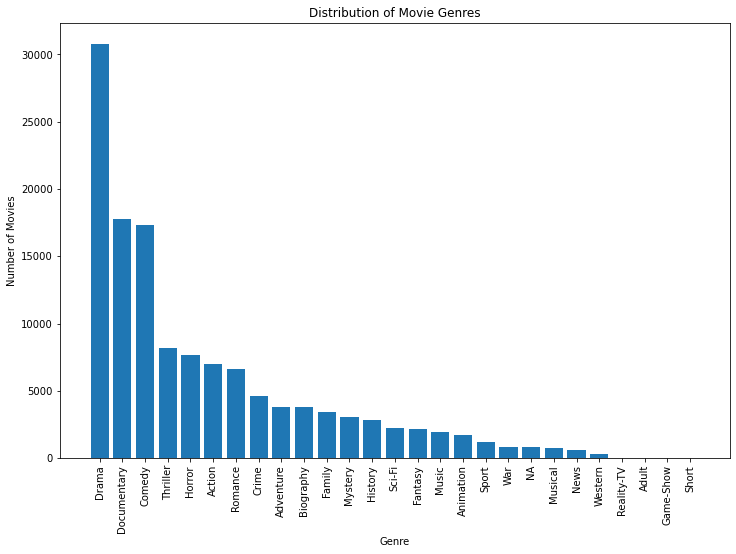

In [28]:
# Split the genres column into individual genres
genres = combined_df['genres'].str.split(',')

# Flatten the list of genres
genres = [genre for sublist in genres for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(genres).value_counts()

# Plot the distribution of genres
figure = plt.figure(figsize=(12, 8))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Genres")
plt.xticks(rotation=90)
plt.show()

**ii. Analysis of ratings**

In [29]:
#explore the statistics of the combined dataframe
combined_df.describe().round()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.0,73856.0,73856.0,73856.0
mean,2014.0,85.0,6.0,3524.0
std,3.0,200.0,1.0,30294.0
min,2010.0,0.0,1.0,5.0
25%,2012.0,75.0,6.0,14.0
50%,2014.0,90.0,6.0,49.0
75%,2016.0,101.0,7.0,282.0
max,2019.0,51420.0,10.0,1841066.0


The average movie runtime in minutes is 85 minutes. The average moving rating is 6/10, while the average number of votes a movie receives is 3524

Exploring the average rating further:

In [30]:
combined_df1 = combined_df.groupby(by=['averagerating']).count().reset_index()

In [31]:

combined_df1.sort_values(by=['averagerating'], ascending = False, inplace= True)

In [32]:
combined_df1.head()

,averagerating,tconst,primary_title,original_title,start_year,runtime_minutes,genres,numvotes
90,10.0,16,16,16,16,16,16,16
89,9.9,5,5,5,5,5,5,5
88,9.8,15,15,15,15,15,15,15
87,9.7,12,12,12,12,12,12,12
86,9.6,18,18,18,18,18,18,18


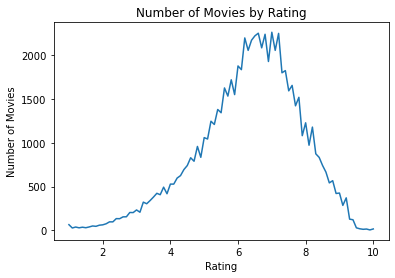

In [33]:
#plotting a line graph
sns.lineplot(x='averagerating', y= 'tconst', data= combined_df1.head(100))
plt.title("Number of Movies by Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Movies");

The graph above confirms that average rating of most movies is between 6-7

In [34]:
#number of unique genres in the dataset
combined_df['genres'].nunique()

924

In [35]:
combined_df['genres']

0          Action,Crime,Drama
1             Biography,Drama
2                       Drama
3                Comedy,Drama
4        Comedy,Drama,Fantasy
                 ...         
73851             Documentary
73852            Drama,Family
73853             Documentary
73854                      NA
73855             Documentary
Name: genres, Length: 73856, dtype: object

In [36]:
#most common genres
common_genres = combined_df['genres'].value_counts(normalize=True).sort_values(ascending=False)
common_genres.head(10)

Drama                   0.157225
Documentary             0.139637
Comedy                  0.075999
Horror                  0.036449
Comedy,Drama            0.035434
Thriller                0.021054
Drama,Romance           0.020445
Comedy,Romance          0.016735
Comedy,Drama,Romance    0.016356
Horror,Thriller         0.013594
Name: genres, dtype: float64

In [37]:
#explore movies genres that receive the highest ratings
grouped_ratings = combined_df.groupby('genres')['averagerating'].mean().reset_index()
grouped_ratings.sort_values(by='averagerating', ascending=False, inplace=True)
grouped_ratings.head(15)

,genres,averagerating
449,"Comedy,Documentary,Fantasy",9.4
633,"Documentary,Family,Musical",9.3
851,"History,Sport",9.2
837,Game-Show,9.0
882,"Music,Mystery",9.0
679,"Documentary,News,Reality-TV",8.8
775,"Drama,Short",8.8
471,"Comedy,Drama,Reality-TV",8.8
681,"Documentary,News,Sport",8.8
717,"Drama,Fantasy,War",8.8


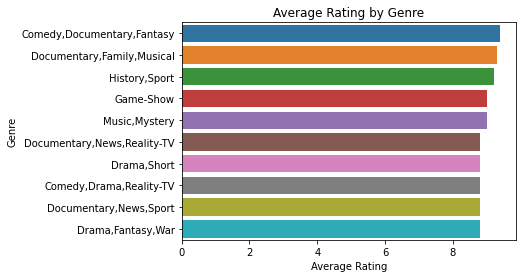

In [38]:
# plottxing top 10 rated genres
sns.barplot(x='averagerating', y='genres', data=grouped_ratings[:10])
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Rating by Genre')
plt.xticks()
plt.show(fig)

Conclusion:The Genre Comedy,Documentary,Fantasy is rated highest by average rating. However, the most common Genre is Drama

# Question 3. What is the relationship between rating vs profit/loss and rating vs release year?

In [39]:
combined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,0.0,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,0.0,NA,6.6,5


In [40]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit/loss,release_month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,12
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,4
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,7
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,9


In [41]:
#merging the dataframes to check the rating and movie budgets
rating_profit_df= pd.merge(combined_df, movie_budgets, left_on= ['primary_title'] , 
                           right_on= ['movie'], how= "inner")

In [42]:
rating_profit_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit/loss,release_month
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-44926294,12
1,tt0326592,The Overnight,The Overnight,2010,88.0,NA,7.5,24,21,"Jun 19, 2015",The Overnight,200000,1109808,1165996,965996,6
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,200000,1109808,1165996,965996,6
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-15686698,3
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-15686698,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016,0.0,Drama,9.1,28,65,"Dec 29, 1995",Richard III,9200000,2684904,4199334,-5000666,12
2871,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,12,"Oct 24, 2008",Heroes,400000,655538,655538,255538,10
2872,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,70,"Feb 6, 2009",Push,38000000,31811527,49678401,11678401,2
2873,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",6.3,5945,33,"Mar 29, 2019",Unplanned,6000000,18107621,18107621,12107621,3


In [43]:

rating_profit_df.shape

(2875, 16)

In [44]:

#dropping the columns
rating_profit_df.drop(columns = ['tconst', 'primary_title','original_title','id' , 
                               'release_month'], axis=1, inplace= True)

In [45]:

rating_profit_df.shape

(2875, 11)

In [46]:

rating_profit_df.head()

,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit/loss
0,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",Foodfight!,45000000,0,73706,-44926294
1,2010,88.0,NA,7.5,24,"Jun 19, 2015",The Overnight,200000,1109808,1165996,965996
2,2015,79.0,"Comedy,Mystery",6.1,14828,"Jun 19, 2015",The Overnight,200000,1109808,1165996,965996
3,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",On the Road,25000000,720828,9313302,-15686698
4,2014,89.0,Drama,6.0,6,"Mar 22, 2013",On the Road,25000000,720828,9313302,-15686698


In [134]:
rating_profit_df.duplicated().sum()

0

Noticed duplicate entries in rating_profit_df with columns movie and release date. To eliminate duplicates values need to drop them from dataframe.

In [47]:

#eliminating the duplicates entries
rating_profit_df.drop_duplicates(subset=['release_date','movie'])

,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit/loss
0,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",Foodfight!,45000000,0,73706,-44926294
1,2010,88.0,NA,7.5,24,"Jun 19, 2015",The Overnight,200000,1109808,1165996,965996
3,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",On the Road,25000000,720828,9313302,-15686698
6,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183
7,2014,114.0,"Action,Crime,Drama",6.5,105116,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,34108587
...,...,...,...,...,...,...,...,...,...,...,...
2870,2016,0.0,Drama,9.1,28,"Dec 29, 1995",Richard III,9200000,2684904,4199334,-5000666
2871,2019,88.0,Documentary,7.3,7,"Oct 24, 2008",Heroes,400000,655538,655538,255538
2872,2019,92.0,Documentary,7.3,33,"Feb 6, 2009",Push,38000000,31811527,49678401,11678401
2873,2019,106.0,"Biography,Drama",6.3,5945,"Mar 29, 2019",Unplanned,6000000,18107621,18107621,12107621


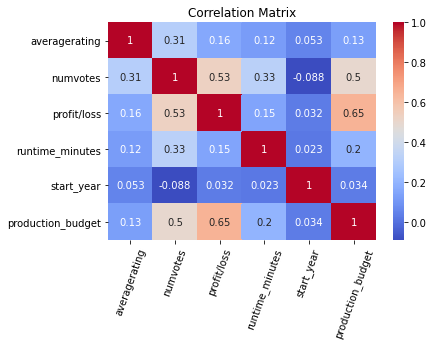

In [48]:

#creating a new dataframe
cor_rating_profit_df= pd.DataFrame(rating_profit_df, columns=['averagerating', 
                                  'numvotes','profit/loss','runtime_minutes',
                                  'start_year','production_budget'])
#plotting a correlation map
sns.heatmap(cor_rating_profit_df.corr(), annot=True, cmap = "coolwarm")
plt.xticks(rotation= 70)
plt.title("Correlation Matrix")
plt.show()

Conclusions:

1. Averagerating Vs profit/loss have 0.16 correlation between them. This means there is a low possibility that movies with higher average ratings have higher profits. 

2. Production_budget Vs profit both have 0.65 correlation between them. This means there is a good possibility that movies with higher investments result in better revenue. 

3. Start_year Vs num votes have a negative(-0.088) correlation. This means that movie rating (num votes) do not depend on the release year.

# Question 4. What is the Average movie runtime?

In [49]:
#check for the longest movies
combined_df.loc[:, ['primary_title', 'runtime_minutes', 'genres']].sort_values(by='runtime_minutes', ascending=False).head(10)

,primary_title,runtime_minutes,genres
70280,Logistics,51420.0,Documentary
27683,Modern Times Forever,14400.0,Documentary
15171,The Clock,1440.0,Drama
71441,Bullfighting Memories,1100.0,"Comedy,History"
72424,La flor,808.0,"Drama,Fantasy,Musical"
67287,Europa: The Last Battle,746.0,Documentary
20818,Double Fine Adventure,724.0,Documentary
53646,Chamisso's Shadow,720.0,Documentary
53649,Paint Drying,607.0,Documentary
71479,"Silence not silence, red not red, live not live",601.0,Drama


In [52]:
combined_df['runtime_minutes'].describe().round()

count    73856.0
mean        85.0
std        200.0
min          0.0
25%         75.0
50%         90.0
75%        101.0
max      51420.0
Name: runtime_minutes, dtype: float64

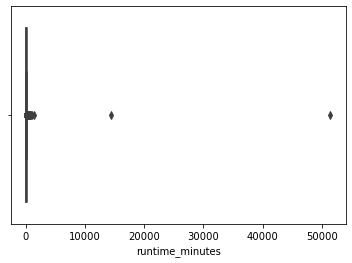

In [53]:
#check for outliers by plotting a boxplot
sns.boxplot(data=combined_df, x='runtime_minutes');

In [54]:
print("There are plenty of outliers. Let's identify and remove them")

There are plenty of outliers. Let's identify and remove them


In [55]:
#Check for outliers in the runtime_minutes column
Q3 = combined_df['runtime_minutes'].quantile(0.75)
Q1 = combined_df['runtime_minutes'].quantile(0.25)
IQR = Q3 - Q1

# Define the outlier range
upper_bound = (Q3 + 1.5*IQR) 
lower_bound = (Q1 - 1.5*IQR)

# Identify the outliers
outliers = combined_df.loc[(combined_df['runtime_minutes'] < lower_bound) | (combined_df['runtime_minutes'] > upper_bound)]

# Print the outliers
outliers

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.0,"Comedy,Drama",6.1,13
5,tt0112502,Bigfoot,Bigfoot,2017,0.0,"Horror,Thriller",4.1,32
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53
12,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584
...,...,...,...,...,...,...,...,...
73828,tt9899290,Band Together with Logic,Band Together with Logic,2019,0.0,Documentary,8.7,10
73830,tt9899850,The Agitation,Ashoftegi,2019,0.0,"Drama,Thriller",4.9,14
73844,tt9905796,July Kaatril,July Kaatril,2019,0.0,Romance,9.0,5
73853,tt9914642,Albatross,Albatross,2017,0.0,Documentary,8.5,8


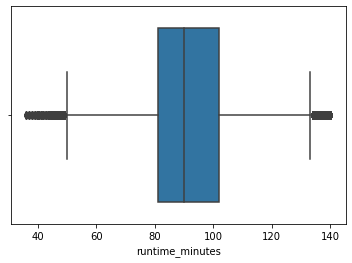

In [56]:
#drop the outliers
combined_df = combined_df.drop(outliers.index, axis=0)

#boxplot after removing outliers
sns.boxplot(data=combined_df, x='runtime_minutes');

<Figure size 864x720 with 0 Axes>

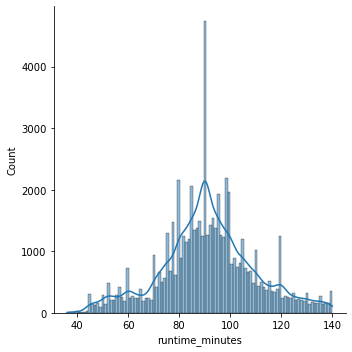

In [57]:
#plot a histogram showing the distribution of run_time minutes
# Filter the data to exclude zero values
filtered_data = combined_df[combined_df['runtime_minutes'] != 0]

figure = plt.figure(figsize=(12, 10))
sns.displot(data=filtered_data, x='runtime_minutes', kde=True);

In [61]:
#mean of the filtered runtime minutes after removing outliers, and zero values
runtime_new_stats = filtered_data['runtime_minutes'].describe().round()
runtime_new_stats


count    63617.0
mean        91.0
std         19.0
min         36.0
25%         81.0
50%         90.0
75%        102.0
max        140.0
Name: runtime_minutes, dtype: float64

In [59]:
print("The outliers were insignificant compared to the size of the dataset. There was a change in most of stats.") 

The outliers were insignificant compared to the size of the dataset. There was a change in most of stats.


Conclusion: The average movie run_time after eliminating outliers is 91 minutes